# 1.Problem statement:

# 2.Data Gathering

In [49]:
import pandas as pd
df=pd.read_csv('Loan_Prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [51]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [52]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [53]:
df['Married'].replace({'Yes':1,'No':0},inplace=True)
df['Education'].replace({'Graduate':1,'Not Graduate':0},inplace=True)
df['Gender'].replace({'Male':1,'Female':0},inplace=True)
df['Self_Employed'].replace({'Yes':1,'No':0},inplace=True)
df['Loan_Status'].replace({'Y':1,'N':0},inplace=True)

In [54]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1


In [55]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [56]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [57]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.000000,360.0,1.0,Urban,1


In [58]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [59]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [60]:
le=LabelEncoder()
df['Dependents']=le.fit_transform(df['Dependents'])
df['Property_Area']=le.fit_transform(df['Property_Area'])

In [61]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

In [62]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    float64
 2   Married            614 non-null    float64
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(7), int32(2), int64(3), object(1)
memory usage: 57.7+ KB


In [64]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.000000,360.0,1.0,2,1


In [65]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Handel outliers:

In [66]:
import seaborn as sns 
import matplotlib.pyplot as plt

C:\Users\Ranjeet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount'>

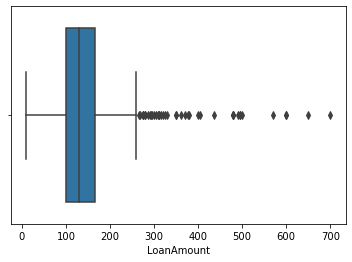

In [67]:
sns.boxplot(df['LoanAmount'])

<AxesSubplot:>

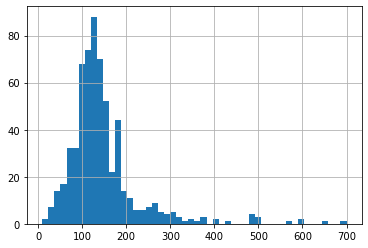

In [68]:
df['LoanAmount'].hist(bins=50)

In [69]:
import numpy as np
df['norm_LoanAmount']=np.log(df['LoanAmount'])     # normalize the outliers using  log,sqrt,cbrt

(array([  1.,   1.,   5.,  16.,  49., 200., 250.,  61.,  19.,  12.]),
 array([2.19722458, 2.63261015, 3.06799573, 3.5033813 , 3.93876688,
        4.37415246, 4.80953803, 5.24492361, 5.68030918, 6.11569476,
        6.55108034]),
 <BarContainer object of 10 artists>)

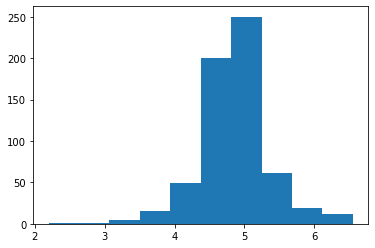

In [70]:
plt.hist(np.log(df['LoanAmount']))

C:\Users\Ranjeet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='norm_LoanAmount'>

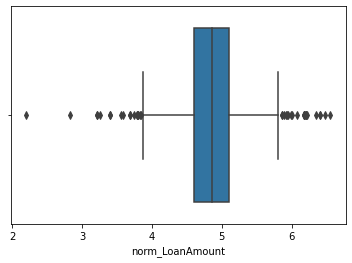

In [71]:
sns.boxplot(df['norm_LoanAmount'])

C:\Users\Ranjeet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='norm_LoanAmount', ylabel='Density'>

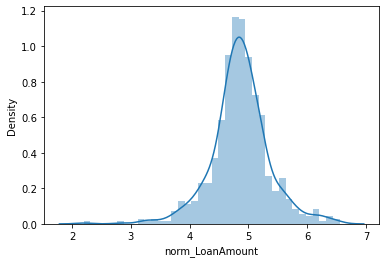

In [72]:
sns.distplot(df['norm_LoanAmount'],kde=True)

In [73]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'norm_LoanAmount'],
      dtype='object')

In [74]:
df['Totalincome']=df['ApplicantIncome'] +df['CoapplicantIncome']


C:\Users\Ranjeet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Totalincome'>

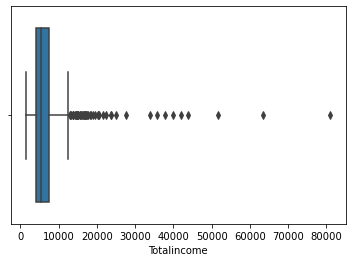

In [75]:
sns.boxplot(df['Totalincome'])

<AxesSubplot:>

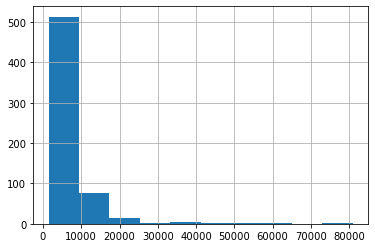

In [76]:
df['Totalincome'].hist()

In [77]:
df['norm_Totalincome']=np.log(df['Totalincome'])

C:\Users\Ranjeet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='norm_Totalincome'>

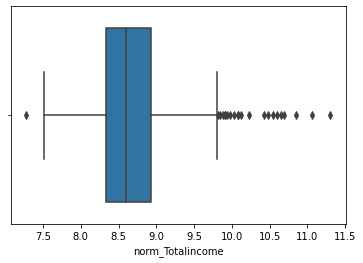

In [78]:
sns.boxplot(df['norm_Totalincome'])

In [79]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,norm_LoanAmount,Totalincome,norm_Totalincome
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,146.412162,360.0,1.0,2,1,4.986426,5849.0,8.674026
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,6091.0,8.714568
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492,4941.0,8.505323
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760,6000.0,8.699515


# Feature selection

In [80]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'norm_LoanAmount', 'Totalincome', 'norm_Totalincome'],
      dtype='object')

In [81]:
df.drop(['Loan_ID','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Totalincome'],axis=1,inplace=True)

In [82]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,norm_LoanAmount,norm_Totalincome
0,1.0,0.0,0,1,0.0,360.0,1.0,2,1,4.986426,8.674026
1,1.0,1.0,1,1,0.0,360.0,1.0,0,0,4.852030,8.714568
2,1.0,1.0,0,1,1.0,360.0,1.0,2,1,4.189655,8.006368
3,1.0,1.0,0,0,0.0,360.0,1.0,2,1,4.787492,8.505323
4,1.0,0.0,0,1,0.0,360.0,1.0,2,1,4.948760,8.699515


In [83]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'norm_LoanAmount', 'norm_Totalincome'],
      dtype='object')

In [84]:
df=df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 
       'norm_LoanAmount', 'norm_Totalincome','Loan_Status']]

In [40]:
df

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,norm_LoanAmount,norm_Totalincome,Loan_Status,Loan_Status
0,1.0,0.0,0,1,0.0,360.0,1.0,2,4.986426,8.674026,1,1
1,1.0,1.0,1,1,0.0,360.0,1.0,0,4.852030,8.714568,0,0
2,1.0,1.0,0,1,1.0,360.0,1.0,2,4.189655,8.006368,1,1
3,1.0,1.0,0,0,0.0,360.0,1.0,2,4.787492,8.505323,1,1
4,1.0,0.0,0,1,0.0,360.0,1.0,2,4.948760,8.699515,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0,1,0.0,360.0,1.0,0,4.262680,7.972466,1,1
610,1.0,1.0,3,1,0.0,180.0,1.0,0,3.688879,8.320205,1,1
611,1.0,1.0,1,1,0.0,360.0,1.0,2,5.533389,9.025456,1,1
612,1.0,1.0,2,1,0.0,360.0,1.0,2,5.231109,8.933664,1,1


In [85]:
df

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,norm_LoanAmount,norm_Totalincome,Loan_Status
0,1.0,0.0,0,1,0.0,360.0,1.0,2,4.986426,8.674026,1
1,1.0,1.0,1,1,0.0,360.0,1.0,0,4.852030,8.714568,0
2,1.0,1.0,0,1,1.0,360.0,1.0,2,4.189655,8.006368,1
3,1.0,1.0,0,0,0.0,360.0,1.0,2,4.787492,8.505323,1
4,1.0,0.0,0,1,0.0,360.0,1.0,2,4.948760,8.699515,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0,1,0.0,360.0,1.0,0,4.262680,7.972466,1
610,1.0,1.0,3,1,0.0,180.0,1.0,0,3.688879,8.320205,1
611,1.0,1.0,1,1,0.0,360.0,1.0,2,5.533389,9.025456,1
612,1.0,1.0,2,1,0.0,360.0,1.0,2,5.231109,8.933664,1


In [86]:
x=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status']

# train test split

# 1.Logistic Regression

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)

In [90]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\Ranjeet\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [91]:
y_pred=lr.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [92]:
y_test

22     0
604    1
181    0
85     1
391    1
      ..
582    1
316    1
449    0
224    1
90     1
Name: Loan_Status, Length: 123, dtype: int64

In [115]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score

In [204]:
lr=accuracy_score(y_test,y_pred)
lr

0.8536585365853658

In [101]:
y_pred_train=lr.predict(x_train)
y_pred_train[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [102]:
y_train[0:5]

458    1
361    1
365    0
94     1
401    0
Name: Loan_Status, dtype: int64

In [159]:
l_r=accuracy_score(y_train,y_pred_train)
l_r

0.8024439918533605

In [106]:
clf_report=classification_report(y_train,y_pred_train)
print(clf_report)

              precision    recall  f1-score   support

           0       0.90      0.42      0.57       154
           1       0.79      0.98      0.87       337

    accuracy                           0.80       491
   macro avg       0.84      0.70      0.72       491
weighted avg       0.82      0.80      0.78       491



# Random Forest

In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [108]:
rf_model=RandomForestClassifier(random_state=1)
rf_model.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [109]:
y_pred=rf_model.predict(x_test)
y_pred[0:5]

array([0, 1, 1, 1, 1], dtype=int64)

In [110]:
y_test[0:5]

22     0
604    1
181    0
85     1
391    1
Name: Loan_Status, dtype: int64

In [111]:
confusion_matrix(y_test,y_pred)

array([[22, 16],
       [ 2, 83]], dtype=int64)

In [113]:
clf_report=classification_report(y_test,y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.92      0.58      0.71        38
           1       0.84      0.98      0.90        85

    accuracy                           0.85       123
   macro avg       0.88      0.78      0.81       123
weighted avg       0.86      0.85      0.84       123



In [162]:
l_r1=accuracy_score(y_test,y_pred)
l_r1

0.8536585365853658

In [116]:
precision_score(y_test,y_pred)

0.8383838383838383

# training accuracy

In [117]:
y_pred_train=rf_model.predict(x_train)
y_pred_train[0:5]

array([1, 1, 0, 1, 0], dtype=int64)

In [118]:
y_train[0:5]

458    1
361    1
365    0
94     1
401    0
Name: Loan_Status, dtype: int64

In [120]:
y_pred_train=rf_model.predict(x_train)
y_pred_train[0:5]

array([1, 1, 0, 1, 0], dtype=int64)

In [121]:
y_train[0:5]

458    1
361    1
365    0
94     1
401    0
Name: Loan_Status, dtype: int64

In [122]:
confusion_matrix(y_train,y_pred_train)

array([[154,   0],
       [  0, 337]], dtype=int64)

In [123]:
clf_report=classification_report(y_train,y_pred_train)
print(clf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           1       1.00      1.00      1.00       337

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491



In [124]:
accuracy_score(y_train,y_pred_train)

1.0

# Using hyperparameter

In [130]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [131]:
para={'n_estimators':np.arange(1,10),
      'criterion':['gini','entropy'],
      'max_depth':np.arange(2,10),
      'min_samples_split':np.arange(2,5),
      'min_samples_leaf':np.arange(2,10)}

rf_model=RandomForestClassifier(random_state=1)
rscv_model=RandomizedSearchCV(rf_model,para,cv=5)
rscv_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4]),
                                        'n_estimators': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [132]:
rscv_model.best_params_

{'n_estimators': 9,
 'min_samples_split': 4,
 'min_samples_leaf': 6,
 'max_depth': 2,
 'criterion': 'gini'}

In [137]:
best_model=RandomForestClassifier(n_estimators=9,
             min_samples_split= 4,
             min_samples_leaf= 6,
             max_depth= 2,
             )
best_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, min_samples_leaf=6, min_samples_split=4,
                       n_estimators=9)

In [148]:
rf_model_rf=best_model.predict(x_test)
rf_model_rf[0:5]

array([0, 1, 1, 1, 1], dtype=int64)

In [139]:
y_pred[0:5]

array([0, 1, 1, 1, 1], dtype=int64)

In [149]:
confusion_matrix(y_test,y_pred)

array([[22, 16],
       [ 2, 83]], dtype=int64)

In [150]:
clf_report=classification_report(y_test,y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.92      0.58      0.71        38
           1       0.84      0.98      0.90        85

    accuracy                           0.85       123
   macro avg       0.88      0.78      0.81       123
weighted avg       0.86      0.85      0.84       123



In [203]:
rf=accuracy_score(y_test,y_pred)
rf

0.8536585365853658

In [153]:
y_pred_train_rf=best_model.predict(x_train)
y_pred_train[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [154]:
y_train[0:5]

458    1
361    1
365    0
94     1
401    0
Name: Loan_Status, dtype: int64

In [155]:
confusion_matrix(y_train,y_pred_train)


array([[ 64,  90],
       [  7, 330]], dtype=int64)

In [156]:
clf_report=classification_report(y_train,y_pred_train)
print(clf_report)

              precision    recall  f1-score   support

           0       0.90      0.42      0.57       154
           1       0.79      0.98      0.87       337

    accuracy                           0.80       491
   macro avg       0.84      0.70      0.72       491
weighted avg       0.82      0.80      0.78       491



In [163]:
rf=accuracy_score(y_train,y_pred_train)
rf

0.8024439918533605

In [165]:
precision_score(y_test,y_pred)

0.8383838383838383

In [166]:
precision_score(y_train,y_pred_train)

0.7857142857142857

# Adaboost Model

In [167]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [168]:
ad_model=AdaBoostClassifier(random_state=1)
ad_model.fit(x_train,y_train)

AdaBoostClassifier(random_state=1)

In [170]:
ad_y_pred=ad_model.predict(x_test)
ad_y_pred[0:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [171]:
y_test[0:5]

22     0
604    1
181    0
85     1
391    1
Name: Loan_Status, dtype: int64

In [201]:
ad=accuracy_score(y_test,ad_y_pred)
ad

0.8211382113821138

In [173]:
confusion_matrix(y_test,ad_y_pred)

array([[22, 16],
       [ 6, 79]], dtype=int64)

In [175]:
clf_report=classification_report(y_test,ad_y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.79      0.58      0.67        38
           1       0.83      0.93      0.88        85

    accuracy                           0.82       123
   macro avg       0.81      0.75      0.77       123
weighted avg       0.82      0.82      0.81       123



In [176]:
precision_score(y_test,ad_y_pred)

0.8315789473684211

# Training Accuracy

In [195]:
y_pred_train=ad_model.predict(x_train)
y_pred_train[0:5]

array([1, 1, 1, 1, 0], dtype=int64)

In [196]:
y_train[0:5]

458    1
361    1
365    0
94     1
401    0
Name: Loan_Status, dtype: int64

In [197]:
confusion_matrix(y_train,y_pred_train)

array([[ 84,  70],
       [ 10, 327]], dtype=int64)

In [198]:
accuracy_score(y_train,y_pred_train)

0.8370672097759674

In [199]:
precision_score(y_test,y_pred)

0.8383838383838383

In [200]:
precision_score(y_train,y_pred_train)

0.8236775818639799

In [206]:
print('Logistic regression accuracy:',lr)
print()
print('Random Forest accuracy:',rf)
print()
print('AdaBoost accuracy:',ad)

Logistic regression accuracy: 0.8536585365853658

Random Forest accuracy: 0.8536585365853658

AdaBoost accuracy: 0.8211382113821138
